Data was collected from the website: U.S. Energy Information Administration https://www.eia.gov/ <br>
THis dataset contains the Renewable energy production   for each month from 1973 to february 2023.<br>
This is the ideal dataset to make practice with time series analysis and forecasting

### Table of Contents

* 1. [Import and introductory study of data](#1)
   * [1.1. Data import and control](#2)
   * [1.2. Explanation of features](#3)

* 2. [Resampling and rolling window](#4)

* 3. [Patterns in the time series](#5)
   * [3.1. Introduction to time-series analysis](#6)
   * [3.2. Components of a time-series](#7)
   * [3.3. Time series terminology](#8)
   * [3.4. Additive and Multiplicative time series ](#9)
   * [3.5. Decomposition of a time series](#10)
  

* 4. [Forecast](#11)
   * [4.1. Autocorrelation](#12)
   * [4.2. Stationary and Non-Stationary Time Series](#13)
   * [4.3. How to test for stationarity?](#14)
   * [4.4. ARIMA](#15)

<a id="1"> </a>
### 1. Import and introductory study of data

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#setting the style of graphs
sns.set(style="darkgrid")

#I always prefer to see all columns
pd.set_option("display.max_columns", None)

In [2]:
#loading the dataset
df= pd.read_excel("Renewable_Energy_Production.xlsx")
df.head() #take a look at the first 5 lines to get familiar with the dataset

Date  Total Renewable Energy Production (Trillion Btu)
0 1973-01-01                                           403.981
1 1973-02-01                                           360.900
2 1973-03-01                                           400.161
3 1973-04-01                                           380.470
4 1973-05-01                                           392.141

In [3]:
print("Shape: {} \n".format(df.shape)) #check the number of rows and columns
df.info() #check features type and missing values

Shape: (602, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date                                              602 non-null    datetime64[ns]
 1   Total Renewable Energy Production (Trillion Btu)  602 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.5 KB


The dates are into the correct datatypes so I don't have to change it in order to manage them

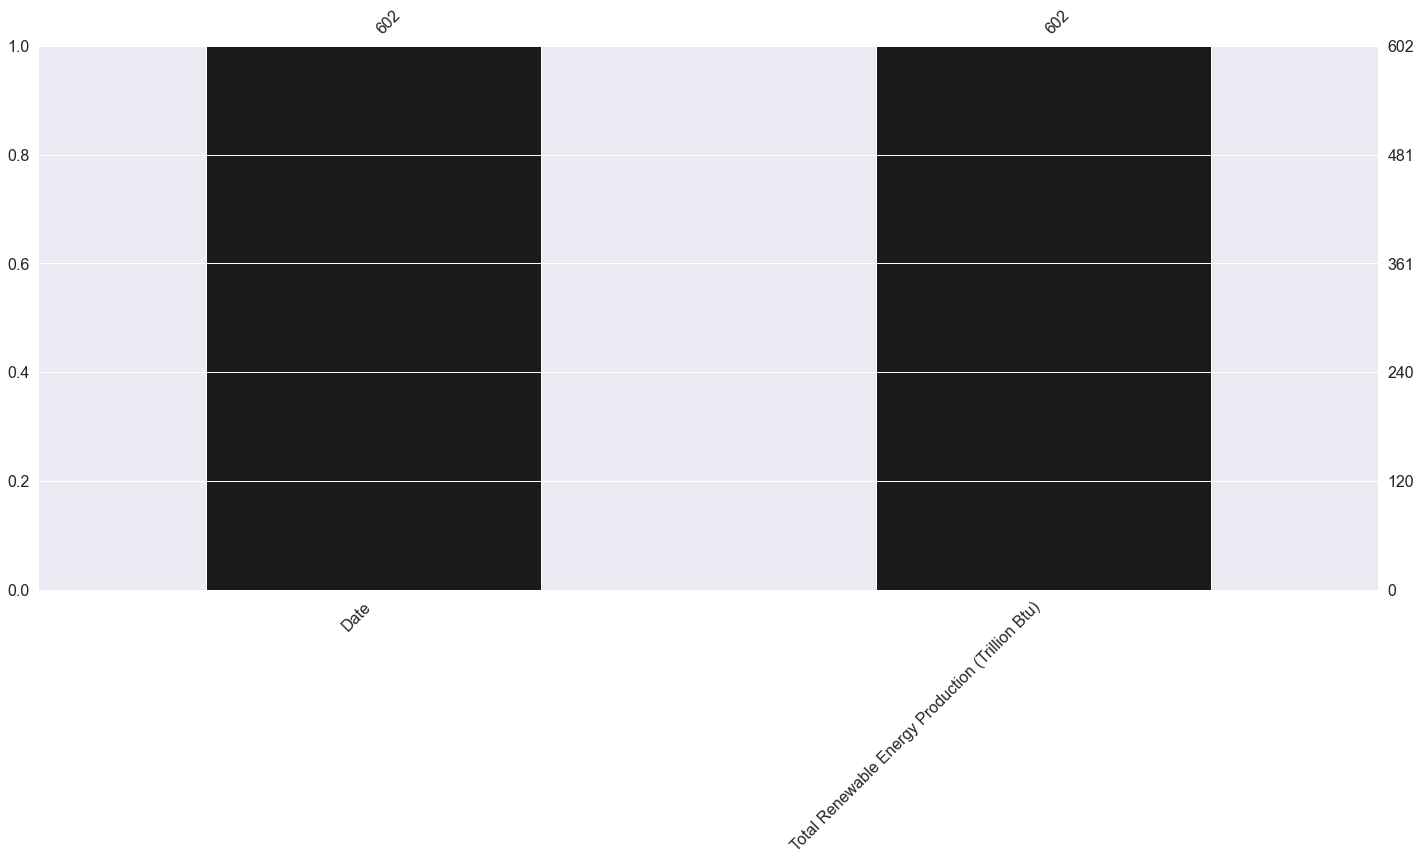

In [4]:
# I've already seen that there are no missing values but I'll do a further check
# df.isnull().sum().any()
msno.bar(df, color=" 0.1")
plt.show()

<a id="3"> </a>
#### 1.2. Explanation of features

* Date: Date of Stock Price - datetime
* Total Renewable Energy Production (Trillion Btu) - continuos numeric                                                                                

There are no missing values, the type of each feature is consistent with the values it contains.<br>

Now I plot a graph Production vs Consumption

In [5]:
fig = px.line(df, x= 'Date', y='Total Renewable Energy Production (Trillion Btu)')


fig.show()


As we can see, this time series has an increasing trend (in particular after 2010), probably a seasonality too

<a id="4"> </a>
### 2.Resampling and rolling window

Resample<br>
When we sample a time series with a frequency lower than the original, we are downsampling. To perform this operation we need an aggregation function.<br>
Conversely, by increasing the sample frequency we are upsampling. What do we need in this case?<br>
Downsampling is another effective tool for inspecting the seasonality of a time series. Let's start by computing the average yearly production.

In [6]:
df.set_index('Date', inplace=True)
df['Total Renewable Energy Production (Trillion Btu)'].resample('Y').mean().head()

Date
1973-12-31    367.578083
1974-12-31    395.154333
1975-12-31    390.593417
1976-12-31    393.929167
1977-12-31    350.747250
Freq: A-DEC, Name: Total Renewable Energy Production (Trillion Btu), dtype: float64

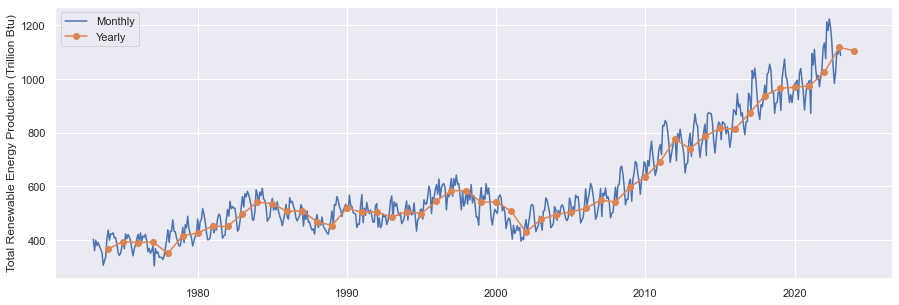

In [7]:
plt.figure(figsize=(15,5))

plt.plot(df, label='Monthly')

plt.plot(df['Total Renewable Energy Production (Trillion Btu)'].resample('Y').mean(),
         marker='o',
         label='Yearly')

plt.ylabel('Total Renewable Energy Production (Trillion Btu)')
plt.legend()
plt.show()

The rolling function is another useful Pandas tool. Like with resample, an aggregation function is required.<br>

Let's suppose we want to analyse energy production mean within a 5-year window.

In [8]:
df['Total Renewable Energy Production (Trillion Btu)'].rolling(60, center=True).mean()

Date
1973-01-01   NaN
1973-02-01   NaN
1973-03-01   NaN
1973-04-01   NaN
1973-05-01   NaN
              ..
2022-10-01   NaN
2022-11-01   NaN
2022-12-01   NaN
2023-01-01   NaN
2023-02-01   NaN
Name: Total Renewable Energy Production (Trillion Btu), Length: 602, dtype: float64

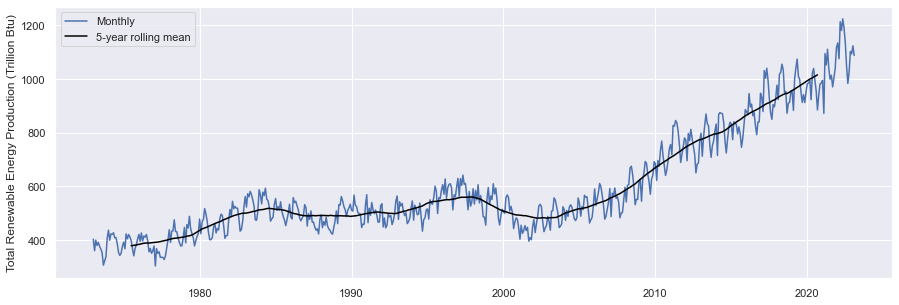

In [9]:
plt.rcParams['figure.figsize'] = (15,5)
plt.plot(df,label='Monthly')

plt.plot(df['Total Renewable Energy Production (Trillion Btu)'].rolling(60, center=True).mean(),
         label='5-year rolling mean',
         color='black')

plt.ylabel('Total Renewable Energy Production (Trillion Btu)')
plt.legend()
plt.show()

<a id="5"> </a>
### 3. Patterns in the time series 

Any time series visualization may consist of the following components: Base Level + Trend + Seasonality + Error.<br>
A trend is observed when there is an increasing or decreasing slope observed in the time series.<br>
A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.<br>
However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.<br>
Another important thing to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.<br>
If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.<br>

<a id="6"> </a>
#### 3.1. Introduction to time-series analysis

A time-series data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.<br>
Time-Series Forecasting is the process of using a statistical model to predict future values of a time-series based on past results.<br>
A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.<br>
Applications of time series are used in statistics, finance or business applications. A very common example of time series data is the daily closing value of the stock index like NASDAQ or Dow Jones. Other common applications of time series are sales and demand forecasting, weather forecasting, econometrics, signal processing, pattern recognition and earthquake prediction.

<a id="7"> </a>
#### 3.2. Components of a time-series

**Base Level** - put simply, its average value. We can think of it as a flat (zero growth) linear trend.<br>
**Trend** - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).<br>
**Seasonality** - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.<br>
**Cyclical Component** - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.<br>
**Irregular Variation** - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.<br>
**ETS Decomposition** - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.

<a id="8"> </a>
#### 3.3. Time series terminology

There are various terms and concepts in time series that we should know. These are as follows:<br>

1 **Dependence**- It refers to the association of two observations of the same variable at prior time periods.<br>

2 **Stationarity**- It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.<br>

3 **Differencing**- Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.<br>

4 **Specification** - It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models.<br>

5 **Exponential Smoothing** - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value. It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other. The exponential smoothing method is used to predict the short term prediction.<br>

6 **Curve fitting** - Curve fitting regression in time series analysis is used when data is in a non-linear relationship.<br>

7 **ARIMA** - ARIMA stands for Auto Regressive Integrated Moving Average.<br>

<a id="9"> </a>
#### 3.4. Additive and Multiplicative time series

We may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, a time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed as either a sum or a product of the components.<br>

Additive time series:<br>
Value = Base Level + Trend + Seasonality + Error <br>

Multiplicative Time Series:<br>
Value = Base Level x Trend x Seasonality x Error<br>

<a id="10"> </a>
#### 3.5. Decomposition of a time series

Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.<br>
The seasonal_decompose in statsmodels implements this conveniently.

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Total Renewable Energy Production (Trillion Btu)'], model='multiplicative')

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Total Renewable Energy Production (Trillion Btu)'], model='additive')

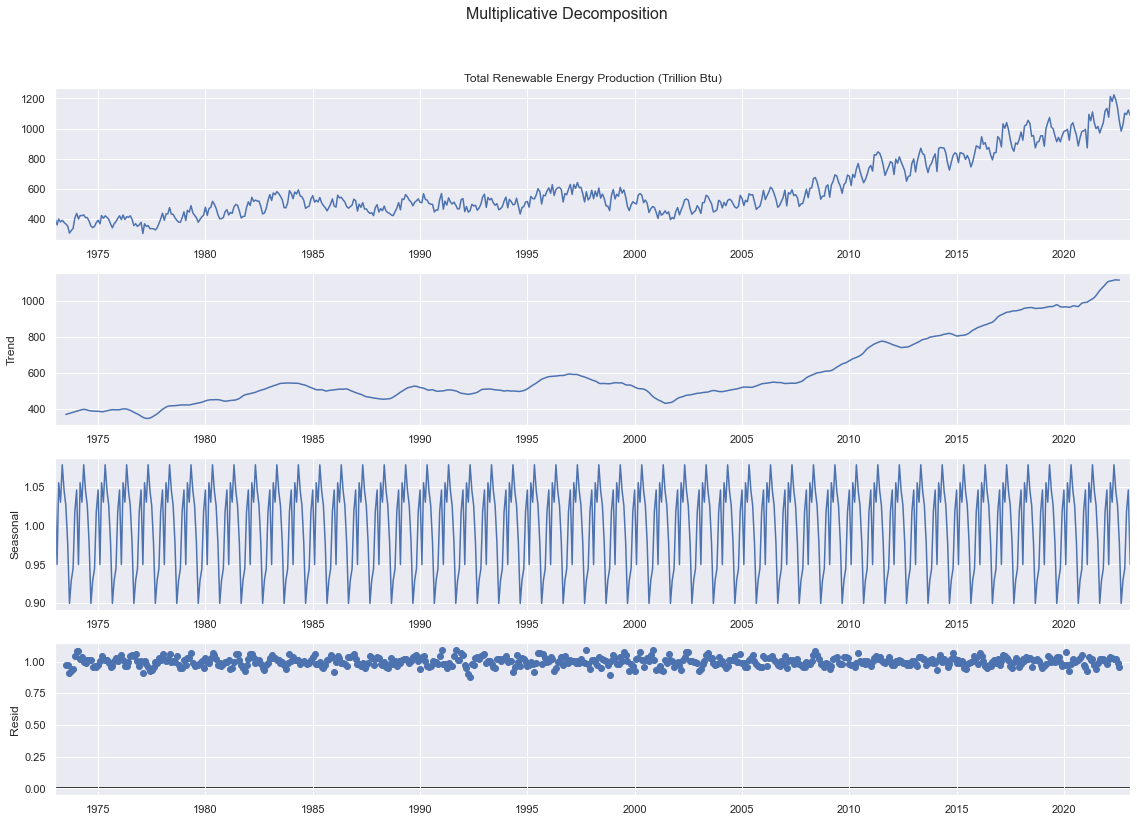

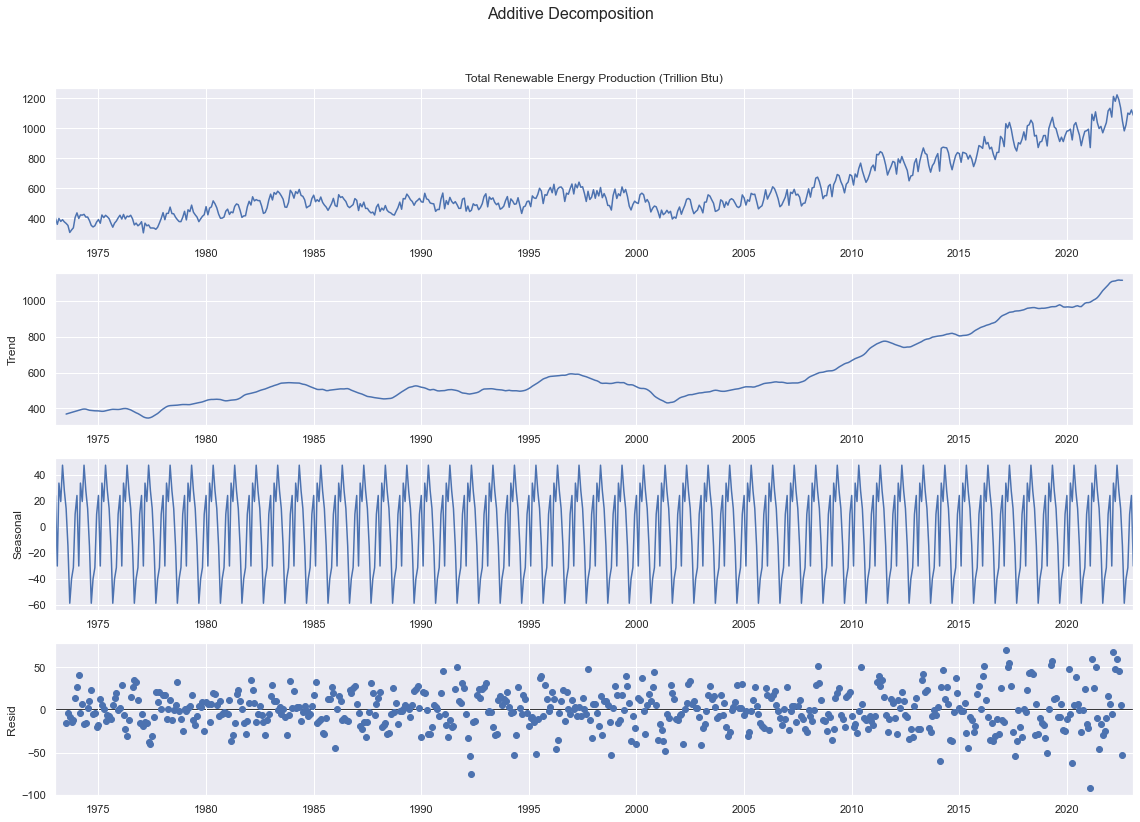

In [11]:
# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

<a id="11"> </a>
### 4. Forecast

The analysis of a time series is basic to predict its future.<br>
Forecasting is a hard process, requiring technical, scientific and business skills. There are many predictive models out there, each one coming with its theoretical intuition and a number of parameters to be tuned.<br>
Statistical models such as ARIMA are among the most widely used to forecast the future of a signal. ARIMA is a "simple" linear model, though it's highly recommended to spend some time on its statistical properties.<br>

<a id="12"> </a>
#### 4.1. Autocorrelation

Checking time series data for autocorrelation in Python is another important part of the analytic process. This is a measure of how correlated time series data is at a given point in time with past values, which has huge implications across many industries. For example, if our data has strong autocorrelation, we can assume that high  numbers today suggest a strong likelihood that they will be high tomorrow as well.

The Pandas data frame has an autocorrelation method that we can use to calculate the autocorrelation in our data. Let’s do this for a one-year lag:

In [12]:
autocorrelation_lag1 = df['Total Renewable Energy Production (Trillion Btu)'].autocorr(lag=1)
print("One Year Lag: ", autocorrelation_lag1)

One Year Lag:  0.976856997633348


Now, let’s try three, 5 and ten year:

In [13]:
autocorrelation_lag3 = df['Total Renewable Energy Production (Trillion Btu)'].autocorr(lag=3)
print("Three Year Lag: ", autocorrelation_lag3)

autocorrelation_lag5 = df['Total Renewable Energy Production (Trillion Btu)'].autocorr(lag=5)
print("Five Year Lag: ", autocorrelation_lag5)

autocorrelation_lag10 = df['Total Renewable Energy Production (Trillion Btu)'].autocorr(lag=10)
print("Ten Year Lag: ", autocorrelation_lag10)

Three Year Lag:  0.9486194725765589
Five Year Lag:  0.9408616844210428
Ten Year Lag:  0.9483663291960729


We see that, even with a ten-year lag, the data is highly autocorrelated. This is further illustration of the short- and long-term trends in the data.

As we saw before, The common way to test for seasonality of a time series is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar.

However, if we want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. There is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

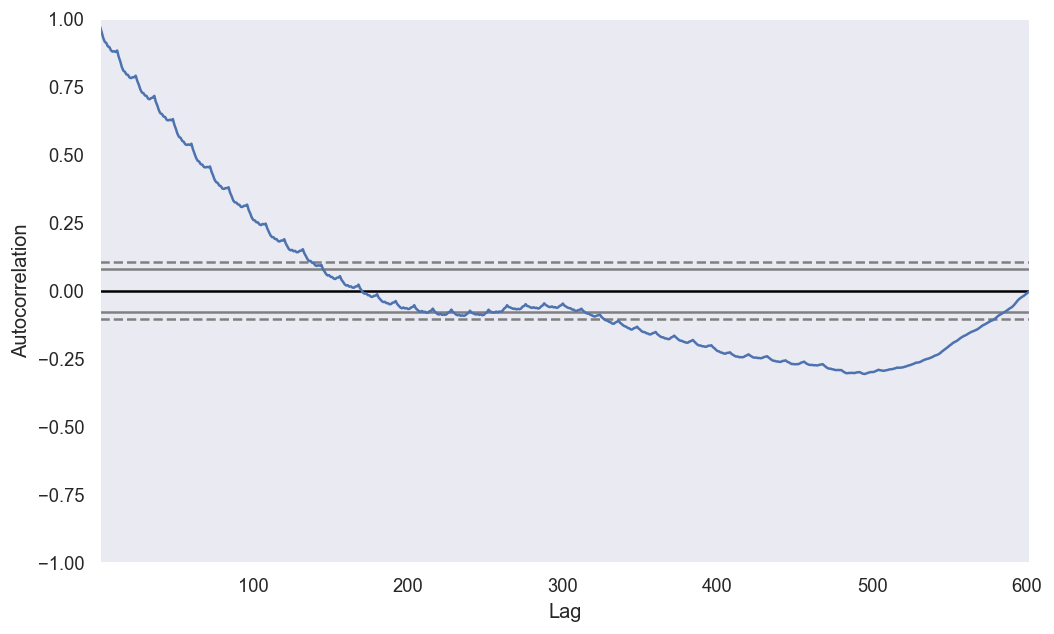

In [14]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Total Renewable Energy Production (Trillion Btu)'].tolist())
plt.show()

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.
Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

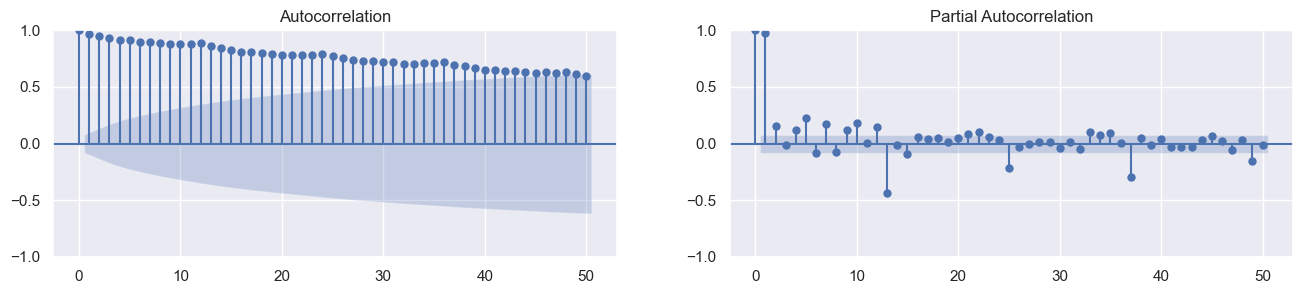

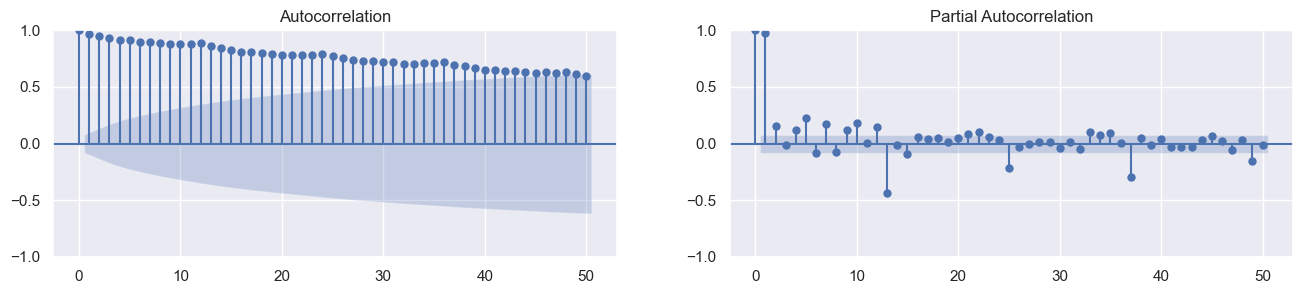

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Total Renewable Energy Production (Trillion Btu)'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Total Renewable Energy Production (Trillion Btu)'].tolist(), lags=50, ax=axes[1])

<a id="13"> </a>
#### 4.2. Stationary and Non-Stationary Time Series

Now, we wil discuss Stationary and Non-Stationary Time Series. Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time. So, the values are independent of time.
Hence the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, as said before.
A stationary time series is independent of seasonal effects as well. <br>


Like a stationary series, the white noise is also not a function of time. So, its mean and variance does not change over time. But the difference is that, the white noise is completely random with a mean of 0. In white noise there is no pattern. Mathematically, a sequence of completely random numbers with mean zero is a white noise.

You should check for stationarity because it not only makes modeling time series easier, but it is an underlying assumption in many time series methods. Specifically, stationarity is assumed for a wide variety of time series forecasting methods including autoregressive moving average (ARMA), ARIMA and Seasonal ARIMA (SARIMA).

We can covert any non-stationary time series into a stationary one by applying a suitable transformation. Mostly statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

We can apply some sort of transformation to make the time-series stationary. These transformation may include:
1.	Differencing the Series (once or more)
2.	Take the log of the series
3.	Take the nth root of the series
4.	Combination of the above <br>

The most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.


Reasons to convert a non-stationary series into stationary one before forecasting<br>
•	If Y_t is the value at time t, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.<br>
•	If the first difference doesn’t make a series stationary, we can go for the second differencing and so on.<br>
•	For example, consider the following series: [1, 5, 2, 12, 20]<br>
•	First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]<br>
•	Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]<br>


<a id="14"> </a>
#### 4.3. How to test for stationarity?

The stationarity of a series can be checked by looking at the plot of the series.
Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.
There are several quantitative methods we can use to determine if a given series is stationary or not. This can be done using statistical tests called Unit Root Tests. This test checks if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:
1. Augmented Dickey Fuller test (ADF Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
3. Philips Perron test (PP Test)

We will use the Dickey Fuller test to check for stationarity in our data. This test will generate critical values and a p-value, which will allow us to accept or reject the null hypothesis that there is no stationarity. If we reject the null hypothesis, that means we accept the alternative, which states that there is stationarity.
These values allow us to test the degree to which present values change with past values. If there is no stationarity in the data set, a change in present values will not cause a significant change in past values.<br>
In other words:the test works by testing the null hypothesis that indicates non stationarity. <br>
If the p-value of the test is below a pre-specified significance level, tipically 0.05, the null hypothesis is rejected and the time series is considered stationary.<br>
If the p-value is above the significance level, the null hypothesis cannot be rejected and the time series is considered non-stationary.<br>
Let’s test for stationarity in our data. To start, let’s calculate a five-year rolling mean:

In [16]:
rolling_mean = df.rolling(60).mean()
rolling_std = df.rolling(60).std()

Next, let’s overlay our time series with the five-year rolling mean and five-year rolling standard deviation.

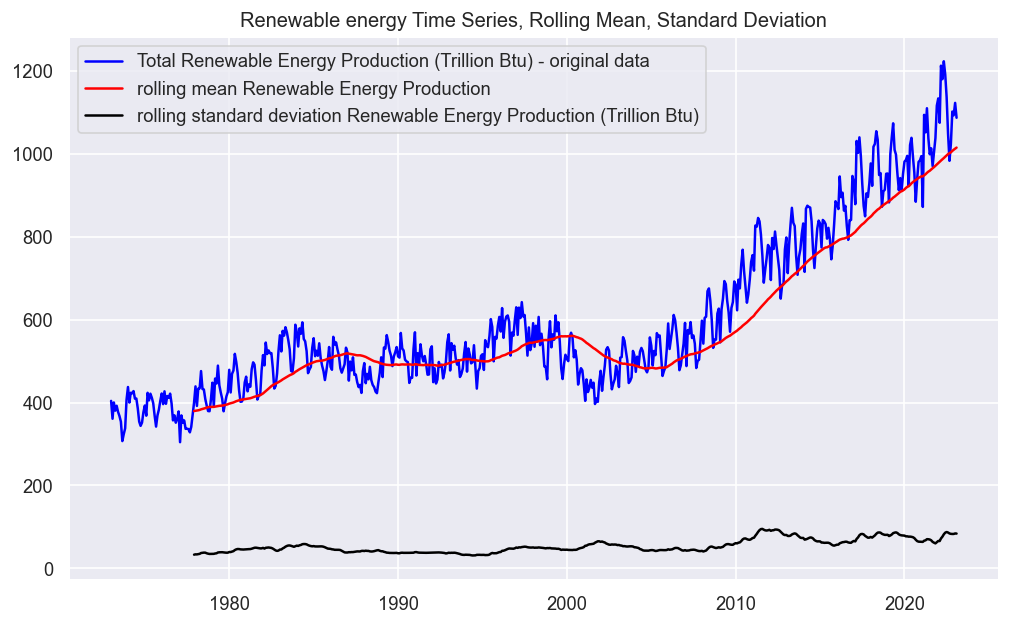

In [17]:
#First, let’s make a Matplotlib plot of our time series:
plt.plot(df, color="blue",label='Total Renewable Energy Production (Trillion Btu) - original data')
#Then the rolling mean:
plt.plot(rolling_mean, color="red", label='rolling mean Renewable Energy Production')
#And finally, the rolling standard deviation:
plt.plot(rolling_std, color="black", label = 'rolling standard deviation Renewable Energy Production (Trillion Btu)')
#Let’s then add a title and a legend:
plt.title("Renewable energy Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")
plt.show()

Next, let’s import the augmented Dickey-Fuller test from the statsmodels package. The documentation for the test can be found here. https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [18]:
from statsmodels.tsa.stattools import adfuller
#Next, let’s pass our data frame into the adfuller method. Here, we specify the autolag parameter as “AIC,” which means that the lag is chosen to minimize the information criterion:
adft = adfuller(df,autolag="AIC")
#Next, let’s store our results in a data frame display it:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)


       Values                       Metric
0    1.398710              Test Statistics
1    0.997108                      p-value
2   17.000000             No. of lags used
3  584.000000  Number of observations used
4   -3.441597          critical value (1%)
5   -2.866502          critical value (5%)
6   -2.569412         critical value (10%)


We can see that our data is not stationary from the fact that our p-value is greater than 5 percent and the test statistic is greater than the critical value. We can also draw these conclusions from inspecting the data, as we see a clear, increasing trend.

<a id="15"> </a>
#### 4.4. ARIMA

Time series forecasting allows us to predict future values in a time series given current and past data. Here, we will use the ARIMA method to forecast the renewable energy production, which allows us to forecast future values in terms of a linear combination of past values. 
ARIMA, short for Autoregressive Integrated Moving Average, is a statistical tool that relies on past values to predict future values. It is characterized by 3 terms:<br>
p – the order of the Auto Regressive term, that is the lagged values of y to be used as the prediction.<br>
q – the order of the Moving Average term which uses past forecast errors.<br>
d – the minimum number of differencing.<br>
Differencing, I repeat it again,  is a method utilized to make a time series stationary. This goes without saying that a series has to be stationary before you can feed it into the ARIMA model.<br>
Non-stationary data is time series data whose statistical properties, e.g., mean and variance, change over time. There are several methods to check if data is stationary or not. In this case I've choosen the Augmented Dickey-Fuller test.<br>
We will use the auto_arima package, which will allow us to forgo the time consuming process of hyperparameter tuning, as well as transforming data into stationary.<br>
First, let’s split our data for training and testing and visualize the split:

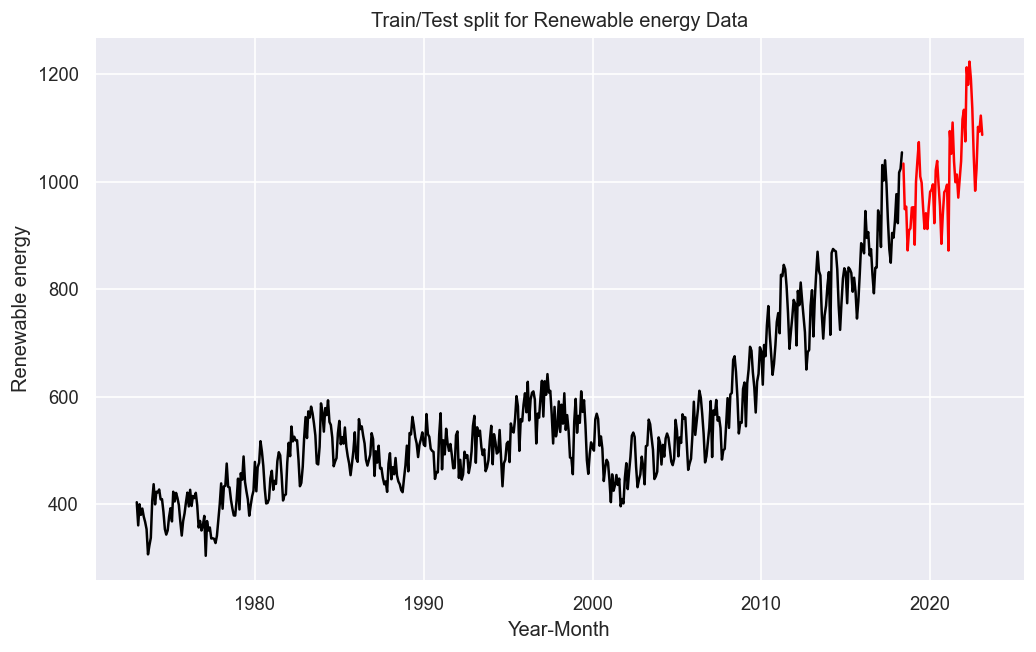

In [19]:
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("2018-06", format='%Y-%m')]
train['train'] = train['Total Renewable Energy Production (Trillion Btu)']
del train['Date']
del train['Total Renewable Energy Production (Trillion Btu)']
test = df[df['Date'] >= pd.to_datetime("2018-06", format='%Y-%m')]
del test['Date']
test['test'] = test['Total Renewable Energy Production (Trillion Btu)']
del test['Total Renewable Energy Production (Trillion Btu)']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Renewable energy Data")
plt.ylabel("Renewable energy")
plt.xlabel('Year-Month')
sns.set()
plt.show()


The black line corresponds to our training data and the red line corresponds to our test data.

Let’s import auto_arima from the pmdarima package, train our model and generate predictions:

In [20]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='trace', suppress_warnings=True, n_jobs=-1, 
                   stationary=False, test='adf', max_d=5)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5547.227, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5521.575, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5519.600, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5545.726, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5477.666, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5479.107, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5479.327, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5516.754, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5523.480, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5481.877, Time=0.12 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.894 seconds


Now, let’s display the output of our model:

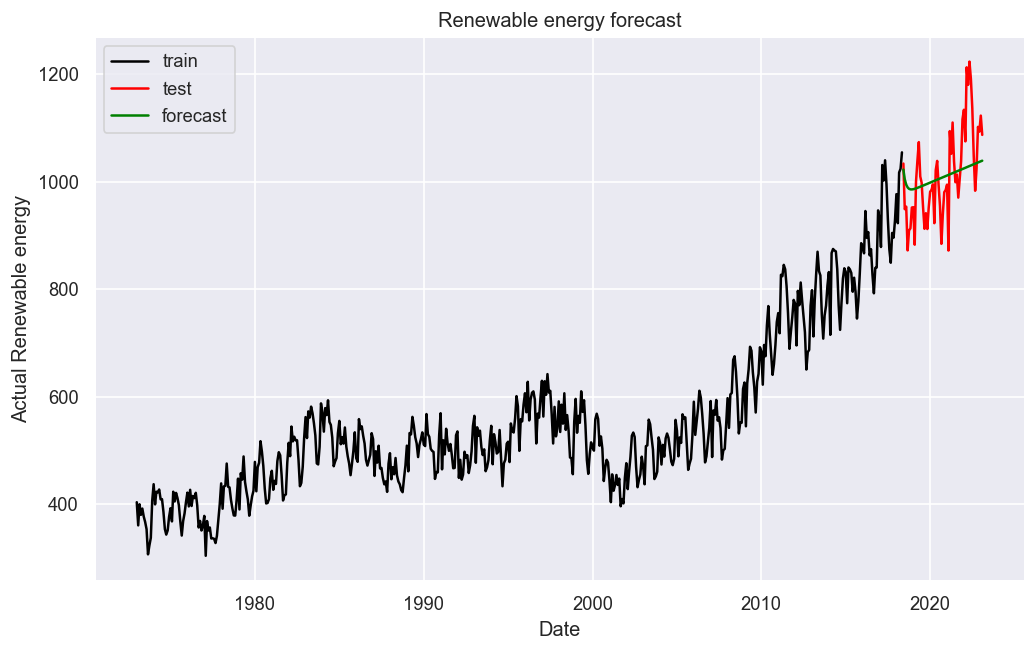

In [21]:
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("2018-06", format='%Y-%m')]
train['train'] = train['Total Renewable Energy Production (Trillion Btu)']
del train['Date']
del train['Total Renewable Energy Production (Trillion Btu)']
test = df[df['Date'] >= pd.to_datetime("2018-06", format='%Y-%m')]
del test['Date']
test['test'] = test['Total Renewable Energy Production (Trillion Btu)']
del test['Total Renewable Energy Production (Trillion Btu)']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = 'green')
plt.title("Renewable energy forecast")
plt.ylabel("Actual Renewable energy")
plt.xlabel('Date')
plt.legend(loc="best", labels= ['train', 'test', 'forecast'])
sns.set()
plt.show()

Our predictions are shown in green and the actual values are shown in red.

Finally, let’s calculate root mean squared error (RMSE):

In [22]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,forecast))
mse = mean_squared_error(test,forecast)
print("RMSE: ", rmse)
print('MSE:', mse)


RMSE:  75.13337951343244
MSE: 5645.024717109471


The error is high and due to a certain volatility still present in the field of renewable energies